Introduction
============

*velopy.py* (velopy) is a python library (module) to support some calculations relevant to road cycling training.

+  Output the Coggan/Hunter Training zones
+  Calculate percent of FTP or MAP from Power and vice versa
+  Calculate kJoule or kcal (Calories) spent for some workout
+  Predict the Performance Manager Chart (TSS) from given CTL, ATL and a set of planned workouts
+  Support calculations of power for velocity (P(v)) and velocity resulting from a given power (v(P)) using a simple power model

Some terms:

+ FTP = Functional Threshold Power
+ MAP = Maximum Aerobic Power, approximately the maximum power you can hold for 7 minutes (CP7)
+ TSS = Training Stress Score
+ CTL = Chronic Training Load ("fitness")
+ ATL = Acute Training Load ("fatigue")
+ TSB = Training Stress Balance (CTL-ATL, "freshness")



After importing *velo* prints the current FTP and MAP values.

In [1]:
%pylab inline
import velopy
#reload(velo)

Populating the interactive namespace from numpy and matplotlib
velo loaded - FTP: 290, MAP: 341, Zones: ['0', '160', '218', '261', '304', '348', '435']


You may wish to set `FTP` and `MAP` to your own values. Alternatively you can of course edit `velopy.py` directly.

In [2]:
velopy.FTP=290
velopy.MAP=velopy.FTP/0.85

Print the lower values of the Coggan/Hunter training zones:

In [3]:
[velopy.watts_ftp(i) for i in velopy.zones]

[0.0, 159.5, 217.5, 261.0, 304.5, 348.0, 435.0]

Print any power in percent of FTP and MAP:

In [4]:
(velopy.ftp_watts(330),
velopy.map_watts(330))

(113.79310344827587, 96.72413793103448)

There is a convenience method to show what we know about a certain power:

In [5]:
velopy.show_watts(330)

['L5', '113.8 %FTP', '96.7 %MAP']

What power corresponds to 85% FTP?

In [6]:
velopy.watts_ftp(85)

246.5

Where is your sweet spot?

In [7]:
velopy.sst_watt_zone()

[255.2, 272.6]

Note that ftp_watts(p)/100. is equal to IF (Intensity Factor). There is no special method to calculate Watts/kg because you can do it on your own:

In [8]:
velopy.watts_ftp(100)/72.0

4.027777777777778

There are some more methods to provide simple conversions. See `dir(velo)` or `help(velo)`.

Energy consumption
==================

Power times duration is energy.<br>
With *velo* you can calculate the exact energy spent and estimate the calories consumed. You can also calculate TSS here.<br>
To demonstrate this, we first define a workout.<br> The format is (`duration` in minutes, `average power` during duration).
E.g. `workout=(60,200,10,320)` corresponds to 60 minutes at 200 Watts and 10 minutes at 320 W.

In [9]:
workout=(60,200,10,320)

In [10]:
velopy.kjoule_workout(workout)

912.0

We can estimate the calories burned (kcal) using a realistic efficiency factor of 0.23. (0.23 is the default and can be skipped)

In [11]:
velopy.kcal_workout(workout,0.23)

946.8939130434783

And of course the TSS can be calculated too

In [12]:
velopy.tss_workout(workout)

67.85572730875941

Of course, you can predict simple, steady efforts by the same way (50 minutes at 85% FTP)

In [13]:
(velopy.kcal_workout([velopy.watts_ftp(85), 50]), velopy.tss_workout([velopy.watts_ftp(85),50]))

(767.7939130434783, 12.212643678160921)

Performance Management (TSS)
============================
CTL decays with a time constant of 42 while ATL has a smaller time constant of 7.
The method `tss_impact` and `tss_decay` are basically for demonstrative purposes.

In [14]:
velopy.tss_decay(70,42,10) # how much fitness (CTL (42)) is left from CTL=70 after 10 days of doing nothing

55.16893394217177

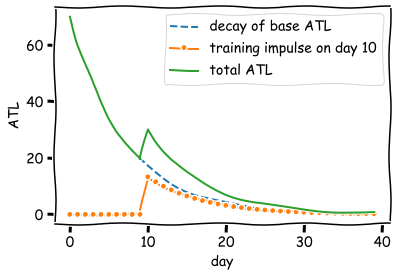

In [15]:
with plt.xkcd():    # I just like xkcd!
    days=np.arange(40)
    a=np.array([velopy.tss_decay(70,7,day) for day in days])
    b=np.array([velopy.tss_impact(100,7,day-10) for day in days])

    plt.plot(a, '--', label='decay of base ATL')
    plt.plot(b, '.-', label='training impulse on day 10')
    plt.plot(a+b, label='total ATL')
    plt.legend()
    plt.xlabel('day')
    plt.ylabel('ATL')
    plt.show();

TSS planning
------------
If you know your current CTL and ATL then you can predict the effect of your planned workouts.
Define a workout as a list of TSS on subsequent days. For example: [0,100,0,100,120,140,0] means riding 100 TSS tomorrow followed by a day of rest and then three days with increasing TSS volume. Say your current CTL and ATL are 60.5 and 54.6 then:

In [16]:
pmc_planned = velopy.pmc(60.5, 54.6, [0,100,0,100,110,120,0],21)
np.set_printoptions(suppress=True);np.set_printoptions(precision=1)
pmc_planned

array([[  0. ,  60.5,  54.6,   5.9],
       [100. ,  61.4,  60.6,   0.8],
       [  0. ,  60. ,  52.6,   7.4],
       [100. ,  60.9,  58.9,   2. ],
       [110. ,  62.1,  65.7,  -3.6],
       [120. ,  63.4,  72.9,  -9.5],
       [  0. ,  62. ,  63.2,  -1.3],
       [  0. ,  60.5,  54.8,   5.7],
       [  0. ,  59.1,  47.5,  11.6],
       [  0. ,  57.7,  41.2,  16.5],
       [  0. ,  56.3,  35.7,  20.6],
       [  0. ,  55. ,  30.9,  24.1],
       [  0. ,  53.7,  26.8,  26.9],
       [  0. ,  52.4,  23.3,  29.2],
       [  0. ,  51.2,  20.2,  31. ],
       [  0. ,  50. ,  17.5,  32.5],
       [  0. ,  48.8,  15.1,  33.7],
       [  0. ,  47.7,  13.1,  34.5],
       [  0. ,  46.6,  11.4,  35.2],
       [  0. ,  45.5,   9.9,  35.6],
       [  0. ,  44.4,   8.6,  35.8]])

In the output above the rows represent subsequent days. We look 20 days ahead because we want to do so.<br>
The first column is your planned TSS value. The second and third stand for the resulting CTL and ATL. The last column is the TSB (the difference of CTL and ATL). Let's plot that:

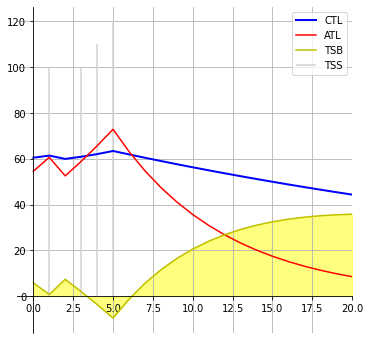

In [17]:
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(1,1,1)
X=np.arange(pmc_planned.shape[0])
ax1.vlines(X, 0, pmc_planned[:,0], color='lightgrey', label='TSS')
ax1.plot(X, pmc_planned[:,1], 'b', label='CTL', linewidth=2.0)
ax1.plot(X, pmc_planned[:,2], 'r', label='ATL')
ax1.plot(X, pmc_planned[:,3], 'y', label='TSB')
ax1.fill_between(X, 0, pmc_planned[:,3], color='yellow', alpha=0.5)

ax1.set_xlim(xmax=pmc_planned.shape[0]-1)
ax1.spines['left'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_color('none')
ax1.grid(True)
ax1.legend()
show(fig)

Physical Power and velocity
===========================
*velo* includes a simple model to infer power from velocity and slope and vice versa

    P = P_Air + P_Wheel + P_Climb
    P = 1/2*rho*CdA*v^3 + Crr*M*g*v + slope*M*g*v
    
This model neglects accelerations (non-steady efforts or lots of curves) and any drive train efficiency. The latter assumption is entirely valid, if you measure power with Cycleops Powertap. Also, the effect of wind (front, side, back) is neglected, assuming wind speed of 0.

Explanation of the Parameters:


We are very interested in the inverse function v(P), which is derived in [another notebook](/vvv.ipynb) and is equal to
    
    v(p) = -3.6*(sqrt(p**2/(4*a**2) + b**3/(27*a**3)) - p/(2*a))**Rational(1, 3) + 1.2*b/(a*(sqrt(p**2/(4*a**2) + b**3/(27*a**3)) - p/(2*a))**Rational(1, 3))

This is implemented in *velo* by the function v_p.

In order to verify the formula, we show that v(P(v))=v and P(v(P)) = P

In [18]:
# Validation of inverse function
sp=velopy.Speed(M=82., rho=1.2, cda=0.35, crr=0.004)
slope = 12/100
v0=30; print(v0, sp.velocity(sp.power_total(v0, slope), slope))
P0=300;print(P0, sp.power_total(sp.velocity(P0, slope), slope))


30 30.00000000000002
300 300.00000000000017


Let's play a little: Contributions of P_Air, P_Wheel and P_Climb to total power for different speeds and slopes:

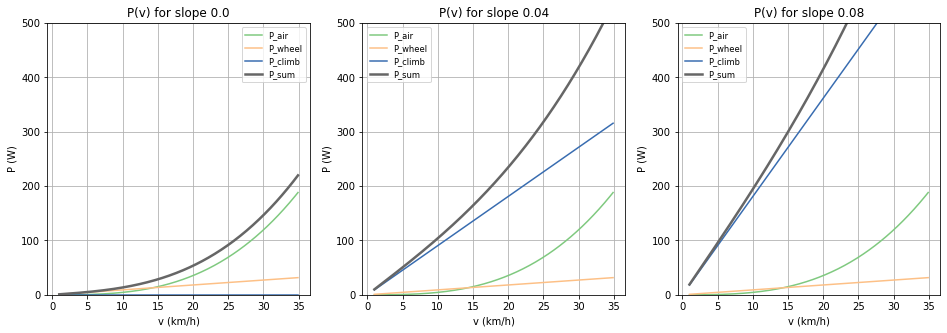

In [19]:
sp = velopy.Speed(M=83,rho=1.18,cda=0.35,crr=0.004)

V = np.arange(1, 35, 0.1)
plot_slopes=[0.0, 0.04, 0.08]

fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
axes=np.array([ax1, ax2, ax3])

colormap = plt.cm.Accent # see http://matplotlib.org/1.3.1/examples/color/colormaps_reference.html
colors = [colormap(i) for i in np.linspace(0, 0.9, 4)]
[ai.set_prop_cycle(color=colors) for ai in axes]

for sl,i_ax in zip(plot_slopes,axes):
    p_A = np.array([sp.power_air(x) for x in V])
    p_W = np.array([sp.power_wheel(x) for x in V])
    p_C = np.array([sp.power_climb(x, sl) for x in V])
    i_ax.plot(V, p_A, label="P_air", lw=1.5)
    i_ax.plot(V, p_W, label="P_wheel", lw=1.5)
    i_ax.plot(V, p_C, label="P_climb", lw=1.5)
    i_ax.plot(V, p_A+p_W+p_C, label="P_sum", lw=2.5)
    i_ax.legend(loc='best',fontsize="small")
    i_ax.set_title("P(v) for slope " + str(sl))
    i_ax.set_ylim(0,500);
    i_ax.set_xlabel("v (km/h)");
    i_ax.set_ylabel("P (W)");
    i_ax.grid();

Some numbers:

In [20]:
print(sp.power_total(18, 0.08))
print(sp.velocity(300, 0.048))

367.672319
21.68027708870369


#### Fun with Alpe d'Huez

What time will you need to climb Alpe'd Huez if you want to hold 300 W?
Air density is little lower see [here](http://www.denysschen.com/catalogue/density.aspx) with T = 15 °C and H = 1300 m (on average) $\to$ $\rho$=1.04.

In [21]:
distance = 13.8
slope = 7.9 / 100.
sp = velopy.Speed(M=84,rho=1.04,cda=0.35,crr=0.004)
v = sp.velocity(300, slope)  # 13.8 km, 7.9%
str(velopy.time_segment(distance, v))

'0:54:52.210202'

And how much faster/slower will you be with more/less weight (maintaining constant power)?

In [22]:
masses = [m for m in arange(75,91)]
duration = []
for m_i in masses:
    v = velopy.Speed(M=m_i, rho=1.04).velocity(300, slope)
    duration.append(str(velopy.time_segment(distance, v)))
list(zip(masses, duration))

[(75, '0:49:46.849149'),
 (76, '0:50:20.348581'),
 (77, '0:50:53.964047'),
 (78, '0:51:27.691658'),
 (79, '0:52:01.527652'),
 (80, '0:52:35.468390'),
 (81, '0:53:09.510356'),
 (82, '0:53:43.650149'),
 (83, '0:54:17.884488'),
 (84, '0:54:52.210202'),
 (85, '0:55:26.624229'),
 (86, '0:56:01.123615'),
 (87, '0:56:35.705510'),
 (88, '0:57:10.367162'),
 (89, '0:57:45.105918'),
 (90, '0:58:19.919218')]

Each kg less makes you ~ 35 seconds faster up to Alpe d'Huez.<br>
What about Pantani and Alpe d 'Huez? He weights ~ 59 kg (without his bike) climbed in 37:35.

In [23]:
m = 59 + 8 + 1
v = distance / (37/60.+35/3600.)   # in km/h
p = velopy.Speed(M=m, rho=1.04, cda=0.3).power_total(v, slope)
print("Power = " + str(p) + ", Watt/kg: " + str(p/59.))

Power = 374.47331760246686, Watt/kg: 6.347005383092658


Lance Armstrong a few years later needed approximately the same time, but with a weight of 71 kg.

In [24]:
m = 71 + 7 + 1
v = distance / (37/60.+36/3600.)   # in km/h
p = velopy.Speed(M=m, rho=1.04, cda=0.35).power_total(v, slope)
print("Power = " + str(p) + ", Watt/kg: " + str(p/71.))

Power = 434.99527364701817, Watt/kg: 6.1266939950284245


#### Time saving per km with 1 kg less weight. Assuming an 'loaded' mass of 82 kg, so that 'unloaded' is 81 kg.

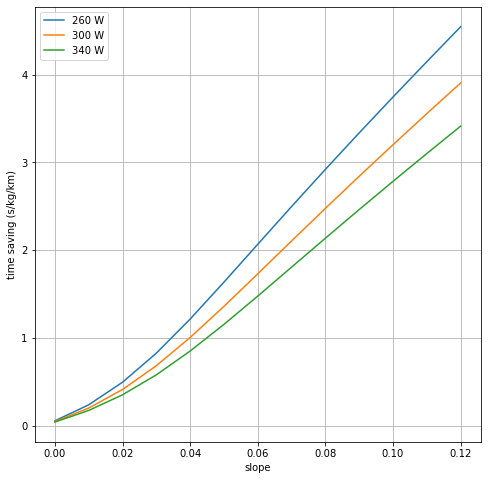

In [25]:
def delta_t_m(distance, slope, P, mass0):
    """
    Return the time difference in seconds for passing the segment (distance, slope) with given mass and mass -1kg
    """
    t1=3600 * distance / float(velopy.Speed(M=mass0, rho=1.2, cda=0.36, crr=0.004).velocity(P,slope))
    t2=3600 * distance / float(velopy.Speed(M=mass0-1.0, rho=1.2, cda=0.36, crr=0.004).velocity(P,slope))
    return t1-t2

x=np.arange(0,0.13,0.01)
y1=[delta_t_m(1,x_i,260,82) for x_i in x]
y2=[delta_t_m(1,x_i,300,82) for x_i in x]
y3=[delta_t_m(1,x_i,340,82) for x_i in x]

fig = plt.figure(figsize=[8,8])
ax2 = fig.add_subplot(1,1,1)
ax2.plot(x, y1, label="260 W");
ax2.plot(x, y2, label="300 W");
ax2.plot(x, y3, label="340 W");
ax2.set_xlabel("slope")
ax2.set_ylabel("time saving (s/kg/km)")
ax2.grid()
ax2.legend(loc="best");


In [26]:
velopy.Speed(M=82., rho=1.2, cda=0.36, crr=0.004).velocity(300, 0.048)

21.735126765111126

#### Cadence & gearing

What Power is required to keep a cadence with a given gearing in a climb?

In [27]:
sp1 = velopy.Speed(M=82., rho=1.2, cda=0.36, crr=0.004)
sp2 = velopy.Speed(M=82+5, rho=1.2, cda=0.42, crr=0.004)

# Power required to keep 'em turning (60 rpm, 39x25, 12% slope)
gears1=30/25
climb1=0.12
cad1=60
gears2=36/28
climb2=climb1
cad2=cad1
v1 = velopy.speed_cadence(cad1, gears1)
v2 = velopy.speed_cadence(cad2, gears2)
print("v1 = %0.2f km/h, v2 = %0.2f km/h" % (v1, v2))
print("P1 = %0.f W, P2 = %0.f W" % (sp2.power_total(v1, climb1), sp2.power_total(v2, climb2)))



v1 = 9.07 km/h, v2 = 9.72 km/h
P1 = 271 W, P2 = 291 W


In [28]:
help(velopy)


Help on module velopy:

NAME
    velopy

DESCRIPTION
    A python module to support analytic cycling with a power meter.
    Created on Tue Oct 29 12:35:40 2013
    @author: christophernst

CLASSES
    builtins.object
        Gearing
        Speed
    
    class Gearing(builtins.object)
     |  Gearing(**kwargs)
     |  
     |  Some helper functions around shifting
     |  in progress
     |  >>> gears = Gearing()
     |  >>> print(gears.rings)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, **kwargs)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  combinations(self)
     |      experimental
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
    
    class Speed(builtins